In [2]:
#import files
import pandas as pd
#data=pd.read_csv('undersample.csv',encoding='utf-16LE')
#data=pd.read_csv('undersample2.csv',error_bad_lines=False)
data=pd.read_csv('undersample.csv')
data



,Unnamed: 0,SALES_ID,COUNTRY,BRAND_CODE,VIP_ID,VIP_CODE,ITEM_LOT_NUMBER,YEAR_MONTH,TXN_CNT,ITEM_CNT,FISCAL_MONTH,EX_RATE_ID,VAT_RATE,PRICERANGE_ID,STORE_CODE,SKU_CODE,LINE_NUMBER,DOCUMENT_NUMBER,ORDER_NUMBER,TRANSACTION_DATE,TRANSACTION_TYPE,TRANSACTION_TYPE_DESC,NET_AMOUNT,QUANTITY,ORIGINAL_SELLING_AMOUNT,RETAIL_SELLING_AMOUNT,COUPON_DISCOUNT_AMOUNT_ITEM,MEMO_COUPON_DISCOUNT_AMOUNT,ITEM_LINE_DISCOUNT_AMOUNT,TAX_AMOUNT,VIP_LINE_DISCOUNT_AMOUNT,SUM_OF_PROMOTION_AMOUNT,MEMO_OR_VIP_TOTAL_DISCOUNT,TRANSACTION_TIME,LAST_MODIFIED_TIME,TENDER,FISCAL_DATE,VAT_AMT,BI_NET_AMOUNT,FISCAL_WEEK,VIP_FIRST_TX,LAST_PURCHASE_TYPE,GENERIC_ARTICLE,MEMBER_SALES,ORIGINAL_SELLING_UNIT_PRICE,RETAIL_SELLING_UNIT_PRICE,MEMO_DISCOUNT,POST_DATE_TIME,SALES_TIER,PROMOTION_CODE_1,PROMOTION_DISCOUNT_AMOUNT_1,PROMOTION_CODE_2,PROMOTION_DISCOUNT_AMOUNT_2,PROMOTION_CODE_3,PROMOTION_DISCOUNT_AMOUNT_3,PROMOTION_CODE_4,PROMOTION_DISCOUNT_AMOUNT_4,PROMOTION_CODE_5,PROMOTION_DISCOUNT_AMOUNT_5,VIP_CENTER_CODE
0,5061353,113352334,China,TNF,15862328.0,CNCTNF000000000066260,194902493487,202106,1,1.0,202203,37,0.13,NaN,7782,NF0A49B29B8100L,1,M15144162,7782_M15144162,2021-06-01,SA,Sales,566.57,1,798.0,798.0,231.43,0.0,0.0,0.0,0.0,0.0,0.0,2021-06-01 07:59:33,2021-06-02 06:26:17.330000000,CA_CASH,2021-06-01,65.1806,566.57,202209,Repeat purchase,NaN,NF0A49B29B81,Non-Member,NaN,NaN,NaN,NaN,C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CNCTNF
1,5061354,113352335,China,TNF,29827202.0,CNVTNF385106641,195437030253,202106,1,1.0,202203,37,0.13,NaN,7782,NF0A4UAKFN410XL,1,M15144169,7782_M15144169,2021-06-01,SA,Sales,194.95,1,298.0,298.0,103.05,0.0,0.0,0.0,0.0,0.0,0.0,2021-06-01 07:59:35,2021-06-03 12:20:07.050000000,CA_CASH,2021-06-01,22.4279,194.95,202209,First time purchase,NaN,NF0A4UAKFN41,Member,NaN,NaN,NaN,NaN,BL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CNVTNF
2,5061355,113352336,China,TNF,24647036.0,CNVTNF368403095,680975620078,202106,1,1.0,202203,37,0.13,NaN,7782,NF0A4QPL173100L,1,M15144171,7782_M15144171,2021-06-01,SA,Sales,368.00,1,798.0,798.0,430.00,0.0,0.0,0.0,0.0,0.0,0.0,2021-06-01 07:59:35,2021-06-03 12:20:07.050000000,CA_CASH,2021-06-01,42.3363,368.00,202209,Repeat purchase,NaN,NF0A4QPL1731,Member,NaN,NaN,NaN,NaN,BL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CNVTNF
3,5061356,113352337,China,TNF,29865126.0,CNVTNF385204099,194114510149,202106,1,1.0,202203,37,0.13,NaN,7782,NF0A3VXFJK310OS,1,M15144174,7782_M15144174,2021-06-01,SA,Sales,408.00,1,598.0,598.0,190.00,0.0,0.0,0.0,0.0,0.0,0.0,2021-06-01 07:59:35,2021-06-03 12:20:07.050000000,CA_CASH,2021-06-01,46.9381,408.00,202209,First time purchase,NaN,NF0A3VXFJK31,Member,NaN,NaN,NaN,NaN,BL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CNVTNF
4,5061357,113352338,China,TNF,29853289.0,CNVTNF385161527,194902419753,202106,1,1.0,202203,37,0.13,NaN,7782,NF0A4T44KY41090,1,M15138827,7782_M15138827,2021-06-01,SA,Sales,408.00,1,798.0,798.0,390.00,0.0,0.0,0.0,0.0,0.0,0.0,2021-06-01 07:59:35,2021-06-03 12:20:07.050000000,CA_CASH,2021-06-01,46.9381,408.00,202209,First time purchase,NaN,NF0A4T44KY41,Member,NaN,NaN,NaN,NaN,BL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CNVTNF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64935,5215948,114445424,China,TNF,29666655.0,CNVTNF384046358,194901491187,202106,0,1.0,202203,37,0.13,NaN,7782,NF0A4U8KV3R100M,1,M16100405,7782_M16100405,2021-06-08,SR,Sales Refund,-163.09,-1,-298.0,-298.0,-134.91,0.0,0.0,0.0,0.0,0.0,0.0,2021-06-08 00:00:00,2021-06-09 12:31:39.440000000,CA_CASH,2021-06-08,-18.7626,-163.09,202210,Repeat purchase,NaN,NF0A4U8KV3R1,Member,NaN,NaN,NaN,NaN,BL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CNVTNF
64936,5215949,114445425,China,TNF,17440661.0,CNVTNF341344913,195437411519,202106,0,1.0,202203,37,0.13,NaN,7782,NF0A5JTSDYZ10XL,1,M16100406,7782_M16100406,2021-06-08,SR,Sales Refund,-144.53,-1,-298.0,-298.0,-153.47,0.0,

In [ ]:
'''from google.colab import drive
drive.mount('/content/gdrive')'''

Mounted at /content/gdrive


In [3]:
!pip install node2vec
import node2vec

In [4]:
colskeep=['VIP_ID','SKU_CODE','QUANTITY']
cf=data[colskeep]
cf

,VIP_ID,SKU_CODE,QUANTITY
0,15862328.0,NF0A49B29B8100L,1
1,29827202.0,NF0A4UAKFN410XL,1
2,24647036.0,NF0A4QPL173100L,1
3,29865126.0,NF0A3VXFJK310OS,1
4,29853289.0,NF0A4T44KY41090,1
...,...,...,...
64935,29666655.0,NF0A4U8KV3R100M,-1
64936,17440661.0,NF0A5JTSDYZ10XL,-1
64937,29865081.0,NF0A4U96UBF1XXL,-1
64938,28648366.0,NF0A5JTSJK310XL,-1


In [5]:
cf=cf.dropna(axis=0)
cf.isnull().sum()

VIP_ID      0
SKU_CODE    0
QUANTITY    0
dtype: int64

In [6]:
import numpy as np
cf['QUANTITY'].replace(-1,np.nan,inplace=True)
cf.dropna(inplace=True)
cf

,VIP_ID,SKU_CODE,QUANTITY
0,15862328.0,NF0A49B29B8100L,1.0
1,29827202.0,NF0A4UAKFN410XL,1.0
2,24647036.0,NF0A4QPL173100L,1.0
3,29865126.0,NF0A3VXFJK310OS,1.0
4,29853289.0,NF0A4T44KY41090,1.0
...,...,...,...
64926,30418246.0,NF0A4U999B8100L,1.0
64927,30419790.0,NF0A4T44ZGJ1090,1.0
64928,30419770.0,NF0A4UBHFN4100M,1.0
64929,16728204.0,NF0A3KWUKX710OS,1.0


In [7]:
def tts(aff):
  import random
  train=[]
  val=[]
  train_id=[]
  val_id=[]
  q=[]
  for i in aff.index:
    t=aff.loc[i]['SKU_CODE']
    id=aff.loc[i]['VIP_ID']
    if len(t)>1:
      v=random.choice(t)
      t.remove(v)
      train.append(t)
      val.append(v)
      train_id.append(id)
      val_id.append(id)
    else:
      v=random.choice(t)
      train.append(t)
      val.append(v)
      train_id.append(id)
      val_id.append(id)
  return(train,val,train_id,val_id)
def adj_list(cf):
  
  aff=cf.groupby('VIP_ID')['SKU_CODE'].apply(list)
  aff=pd.DataFrame(aff)
  aff=aff.reset_index()
  return(aff)



In [8]:
aff=adj_list(cf)
train,val,train_id,val_id=tts(aff)
len(train)

30807

In [9]:
l=[]
flag=0
for i in train:
  #print(i)
  arr=np.array(i)
  l.append(arr)

In [10]:
len(train_id)==len(train)

True

In [11]:
train=l

In [12]:
import networkx as nx
G=nx.Graph()
for i in range(len(train)):
  user=train_id[i]
  item=train[i]
  G.add_node(user,bipartite='user')
  for i2 in item:
    if i2 not in G.nodes():
      G.add_node(i2,bipartite='item')
    G.add_edge(user,i2)

G



In [13]:
cf

,VIP_ID,SKU_CODE,QUANTITY
0,15862328.0,NF0A49B29B8100L,1.0
1,29827202.0,NF0A4UAKFN410XL,1.0
2,24647036.0,NF0A4QPL173100L,1.0
3,29865126.0,NF0A3VXFJK310OS,1.0
4,29853289.0,NF0A4T44KY41090,1.0
...,...,...,...
64926,30418246.0,NF0A4U999B8100L,1.0
64927,30419790.0,NF0A4T44ZGJ1090,1.0
64928,30419770.0,NF0A4UBHFN4100M,1.0
64929,16728204.0,NF0A3KWUKX710OS,1.0


In [14]:
data.VIP_CENTER_CODE.value_counts()

CNVTNF    63810
CNCTNF      613
ABOSTF      352
ASOSTF      158
CNVTN2        7
Name: VIP_CENTER_CODE, dtype: int64

In [15]:
'''
aff3=data.groupby('VIP_ID')['SALES_TIER'].apply(list)
aff3=pd.DataFrame(aff3)
aff3=aff3.reset_index()
aff3



aff4=data.groupby('VIP_ID')['STORE_CODE'].apply(list)
aff4=pd.DataFrame(aff4)
aff4=aff4.reset_index()
aff4



aff5=data.groupby('VIP_ID')['TRANSACTION_DATE'].apply(list)
aff5=pd.DataFrame(aff5)
aff5=aff5.reset_index()
aff5


aff6=data.groupby('VIP_ID')['VIP_CENTER_CODE'].apply(list)
aff6=pd.DataFrame(aff6)
aff6=aff6.reset_index()
aff6

'''




,VIP_ID,VIP_CENTER_CODE
0,2236531.0,[CNCTNF]
1,2415709.0,[CNCTNF]
2,2715702.0,[CNCTNF]
3,2738557.0,[CNCTNF]
4,2868573.0,"[ABOSTF, ABOSTF, ABOSTF, ABOSTF, ABOSTF, ABOSTF]"
...,...,...
30978,30420176.0,[CNVTNF]
30979,30420178.0,"[CNVTNF, CNVTNF, CNVTNF]"
30980,30420184.0,"[CNVTNF, CNVTNF]"
30981,30420200.0,[CNVTNF]


In [17]:
'''nodes=[]
store=[]
date=[]
tie=[]
center=[]
for i in range(len(aff3)):
  user=aff3.loc[i]['VIP_ID']
  tier=aff3.loc[i]['SALES_TIER'][0]
  G.add_node(tier,bipartite='tier')
  if user not in G.nodes():
    G.add_node(user,bipartite='user')
    nodes.append(i2)
    tie.append(i2)
  G.add_edge(user,tier)

for i in range(len(aff4)):
  user=aff4.loc[i]['VIP_ID']
  date=aff4.loc[i]['STORE_CODE']
  for i2 in date:
    if i2 not in G.nodes():
      nodes.append(i2)
      store.append(i2)
      G.add_node(i2,bipartite='store')
    G.add_edge(user,i2)

for i in range(len(aff5)):
  user=aff5.loc[i]['VIP_ID']
  date=aff5.loc[i]['TRANSACTION_DATE']
  for i2 in date:
    nodes.append(i2)
    date.append(i2)
    if i2 not in G.nodes():
      G.add_node(i2,bipartite='date')
    G.add_edge(user,i2)


for i in range(len(aff6)):
  user=aff6.loc[i]['VIP_ID']
  date=aff6.loc[i]['VIP_CENTER_CODE']
  for i2 in date:
    if i2 not in G.nodes():
      nodes.append(i2)
      center.append(i2)
      G.add_node(i2,bipartite='center')
    G.add_edge(user,i2)
'''

KeyboardInterrupt: ignored

In [ ]:
nodes

In [18]:
'''l=list(list(G.nodes())[0:10])
l.append('C1')
l.append('VF')
l.append('BL')
for i in nodes:
  l.append(i)'''

In [ ]:
list(data['VIP_ID'])

In [24]:
'''H = nx.subgraph(G, l)
color_lookup={}
flag=0
for i in set(H.nodes()):
    if i in ['C1','VF','BL']:
      color_lookup[i]=1
    elif i in tier:
      color_lookup[i]=2
    elif i in list(data['VIP_ID']):
      color_lookup[i]=3
    elif i in store:
      color_lookup[i]=4
    elif i in date:
      color_lookup[i]=5
    elif i in tie:
      color_lookup[i]=6

    elif i in center:
      color_lookup[i]=7
    else:
      color_lookup[i]=8'''


In [234]:
'''import matplotlib as mpl
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
low'''

0

In [ ]:
color_lookup

In [ ]:
'''#figure(figsize=(50,30))
figure(figsize=(40,30))
nx.draw_networkx(H, with_labels=False,node_color=[mapper.to_rgba(i) for i in color_lookup.values()],)
plt.show()'''

In [ ]:
user_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 'user'}
user_nodes

In [13]:
G

In [68]:
import time
start=time.time()
from node2vec import Node2Vec as n2v #To run node2vec algorithm
model = n2v(G, dimensions=40, walk_length=80, num_walks=10)#key hyper parameters:walk length, num walks
embedding = model.fit(window=5, min_count=1)
end=time.time()
print(end-start)

Computing transition probabilities:   0%|          | 0/34843 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [19:00<00:00, 114.05s/it]


TypeError: ignored

In [ ]:
#embedding.wv.get_vector('15862328.0')

In [15]:
dic={}
dic_emb={}
for i in train_id:
  emb=embedding.wv.get_vector(str(i))
  dic[i]=emb
  dic_emb[str(emb)]=i

In [16]:
len(list(dic.values()))

30807

In [17]:
list(dic.values())[0]

array([ 0.76747435, -0.42732772,  0.7372898 , -0.70567864, -0.27466974,
        1.3741004 , -0.336155  , -0.255337  , -0.11050073, -0.02268378,
       -0.23171784, -1.1947206 ,  1.0715997 , -0.1372617 ,  0.18736431,
       -0.23497179, -0.6469876 ,  1.2415297 ,  0.9514385 ,  1.1477784 ,
       -0.3594585 , -0.40339133, -0.8140519 ,  0.27345484, -1.0302196 ,
       -0.62091964, -0.3718009 , -0.388195  ,  0.33370522,  0.21688105,
       -0.34771407,  0.79816324, -0.5481745 ,  0.55349994,  0.61245424,
       -0.52186835,  0.04674672,  0.2421078 ,  0.5393213 ,  0.08623172],
      dtype=float32)

In [18]:
x=list(dic.values())

In [19]:
x[0]

array([ 0.76747435, -0.42732772,  0.7372898 , -0.70567864, -0.27466974,
        1.3741004 , -0.336155  , -0.255337  , -0.11050073, -0.02268378,
       -0.23171784, -1.1947206 ,  1.0715997 , -0.1372617 ,  0.18736431,
       -0.23497179, -0.6469876 ,  1.2415297 ,  0.9514385 ,  1.1477784 ,
       -0.3594585 , -0.40339133, -0.8140519 ,  0.27345484, -1.0302196 ,
       -0.62091964, -0.3718009 , -0.388195  ,  0.33370522,  0.21688105,
       -0.34771407,  0.79816324, -0.5481745 ,  0.55349994,  0.61245424,
       -0.52186835,  0.04674672,  0.2421078 ,  0.5393213 ,  0.08623172],
      dtype=float32)

In [20]:
x_train=[]
for i in x:
  x_train.append(np.array(i))

In [21]:
x_train[0]

array([ 0.76747435, -0.42732772,  0.7372898 , -0.70567864, -0.27466974,
        1.3741004 , -0.336155  , -0.255337  , -0.11050073, -0.02268378,
       -0.23171784, -1.1947206 ,  1.0715997 , -0.1372617 ,  0.18736431,
       -0.23497179, -0.6469876 ,  1.2415297 ,  0.9514385 ,  1.1477784 ,
       -0.3594585 , -0.40339133, -0.8140519 ,  0.27345484, -1.0302196 ,
       -0.62091964, -0.3718009 , -0.388195  ,  0.33370522,  0.21688105,
       -0.34771407,  0.79816324, -0.5481745 ,  0.55349994,  0.61245424,
       -0.52186835,  0.04674672,  0.2421078 ,  0.5393213 ,  0.08623172],
      dtype=float32)

In [22]:
aff['SKU_CODE2']=aff['SKU_CODE'].apply(lambda x:np.array(x))
aff

,VIP_ID,SKU_CODE,SKU_CODE2
0,2236531.0,[NF0A535L0621XXS],[NF0A535L0621XXS]
1,2415709.0,[NF0A3YUPTE81090],[NF0A3YUPTE81090]
2,2715702.0,[NF0A55LUJE3100S],[NF0A55LUJE3100S]
3,2738557.0,[NF0A4984NYC1034REG],[NF0A4984NYC1034REG]
4,2868573.0,"[NF0A7QRGJK3100M, NF0A7QRGJK3100M, NF0A7QRCH2G...","[NF0A7QRGJK3100M, NF0A7QRGJK3100M, NF0A7QRCH2G..."
...,...,...,...
30802,30420176.0,[NF0A52UGJK310OS],[NF0A52UGJK310OS]
30803,30420178.0,"[NF0A7QRGZDL100L, NF0A4U9NJK3100LREG]","[NF0A7QRGZDL100L, NF0A4U9NJK3100LREG]"
30804,30420184.0,[NF0A4U9LFN4100L],[NF0A4U9LFN4100L]
30805,30420200.0,[NF0A4T37BQW1090],[NF0A4T37BQW1090]


In [23]:
y=[]
for i in dic.keys():
  y.append(np.array(aff.loc[aff['VIP_ID']==i]['SKU_CODE2']))
#y

In [24]:
ids=list(dic.keys())
ids[0]

2236531.0

In [25]:
embedding

In [26]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import ReduceLROnPlateau


In [27]:
len(cf['SKU_CODE'].unique())

4334

In [28]:
y[0]

array([array(['NF0A535L0621XXS'], dtype='<U15')], dtype=object)

In [29]:
ids[0]

2236531.0

In [30]:
matrix={'name':cf['SKU_CODE'].unique()}
for id in ids:
  mat=[0]*len(cf['SKU_CODE'].unique())
  matrix[id]=mat
#matrix

In [31]:
sps=pd.DataFrame(matrix).T
sps.columns=cf['SKU_CODE'].unique()
sps.drop('name',axis=0,inplace=True)
sps

,NF0A49B29B8100L,NF0A4UAKFN410XL,NF0A4QPL173100L,NF0A3VXFJK310OS,NF0A4T44KY41090,NF0A4U6IL4U100M,NF0A46BVJ941055,NF0A5B1ORG1100L,NF0A5JZ2ZDL100S,NF0A4NFBKX7100L,NF0A4NFKDYX100L,NF0A4U8XA0M100L,NF0A4N9TTBK100M,NF0A4U9OBDT100S,NF0A4U94JK31038REG,NF0A4NFKKS710XL,NF0A4U7DH7E100M,NF0A537DJK3100LREG,NF0A4NBVFN4100S,NF0A7QSEJK310XLREG,NF0A4U8KJK3100M,NF0A4CL1JK310XLREG,NF0A5JZ2ZDL100L,NF0A4ALQR16100L,NF0A4UAWQ4V100L,NF0A4UDMJK3100S,NF0A4NABJK31038REG,NF0A4U92PKH100L,NF0A5AX5JK3100L,NF0A4UDMFN4100S,NF0A4PFOKZ31095,NF0A4U9XH7E10XL,NF0A5B46JK310XL,NF0A3YUPBQW1075,NF0A49AEHFQ100M,NF0A4NCRKS710XL,NF0A3VXFTM810OS,NF0A4U8O173100M,NF0A4N9XZU3100S,NF0A5B46L4U100S,...,NF0A53CYDYX100L,NF0A2RSD1G8100L,NF0A5JUPJK310XL,NF0A5AW47D6100M,NF0A7QS937U100LREG,NF0A3RJC1J1100M,NF0A5AXHJK3100L,NF0A4NFFJE310OS,NF0A3KWRWTX10OS,NF0A46B3TJ21120,NF0A4QYRJK3100LREG,NF0A5AW4JK31XXL,NF0A5AX2JE310XL,NF0A5AXHFN4100L,NF0A4VSSJK310OS,NF0A5AWDZDL100S,NF0A46BX0VV1055,NF0A4UD61731038REG,NF0A4U9MFN410XL,NF0A46BUTJ21070,NF0A48MB06Z1050,NF0A5B44JK310XL,NF0A4U6BNL41XXL,NF0A4UAPRG11030REG,NF0A4T2RYXP1100,NF0A4N9RWEW13XL,NF0A4UBKH7E1XXL,NF0A4UBS11P100L,NF0A46BXZGJ1055,NF0A4U8S15Q1XXL,NF0A4U8S15Q13XL,NF0A4UB8FN4100S,NF0A52QWY791070,NF0A7QS937U1XXLREG,NF0A52Q1LA91095,NF0A4UDKJK3100M,NF0A4U8YV3R10XL,NF0A5AX77D6100S,NF0A5AX77D610XL,NF0A5AW2L4U100MREG
2236531.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2415709.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2715702.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2738557.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2868573.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30420176.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30420178.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30420184.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30420200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
sps_val=pd.DataFrame(matrix).T
sps_val.columns=cf['SKU_CODE'].unique()
sps_val.drop('name',axis=0,inplace=True)
sps_val

,NF0A49B29B8100L,NF0A4UAKFN410XL,NF0A4QPL173100L,NF0A3VXFJK310OS,NF0A4T44KY41090,NF0A4U6IL4U100M,NF0A46BVJ941055,NF0A5B1ORG1100L,NF0A5JZ2ZDL100S,NF0A4NFBKX7100L,NF0A4NFKDYX100L,NF0A4U8XA0M100L,NF0A4N9TTBK100M,NF0A4U9OBDT100S,NF0A4U94JK31038REG,NF0A4NFKKS710XL,NF0A4U7DH7E100M,NF0A537DJK3100LREG,NF0A4NBVFN4100S,NF0A7QSEJK310XLREG,NF0A4U8KJK3100M,NF0A4CL1JK310XLREG,NF0A5JZ2ZDL100L,NF0A4ALQR16100L,NF0A4UAWQ4V100L,NF0A4UDMJK3100S,NF0A4NABJK31038REG,NF0A4U92PKH100L,NF0A5AX5JK3100L,NF0A4UDMFN4100S,NF0A4PFOKZ31095,NF0A4U9XH7E10XL,NF0A5B46JK310XL,NF0A3YUPBQW1075,NF0A49AEHFQ100M,NF0A4NCRKS710XL,NF0A3VXFTM810OS,NF0A4U8O173100M,NF0A4N9XZU3100S,NF0A5B46L4U100S,...,NF0A53CYDYX100L,NF0A2RSD1G8100L,NF0A5JUPJK310XL,NF0A5AW47D6100M,NF0A7QS937U100LREG,NF0A3RJC1J1100M,NF0A5AXHJK3100L,NF0A4NFFJE310OS,NF0A3KWRWTX10OS,NF0A46B3TJ21120,NF0A4QYRJK3100LREG,NF0A5AW4JK31XXL,NF0A5AX2JE310XL,NF0A5AXHFN4100L,NF0A4VSSJK310OS,NF0A5AWDZDL100S,NF0A46BX0VV1055,NF0A4UD61731038REG,NF0A4U9MFN410XL,NF0A46BUTJ21070,NF0A48MB06Z1050,NF0A5B44JK310XL,NF0A4U6BNL41XXL,NF0A4UAPRG11030REG,NF0A4T2RYXP1100,NF0A4N9RWEW13XL,NF0A4UBKH7E1XXL,NF0A4UBS11P100L,NF0A46BXZGJ1055,NF0A4U8S15Q1XXL,NF0A4U8S15Q13XL,NF0A4UB8FN4100S,NF0A52QWY791070,NF0A7QS937U1XXLREG,NF0A52Q1LA91095,NF0A4UDKJK3100M,NF0A4U8YV3R10XL,NF0A5AX77D6100S,NF0A5AX77D610XL,NF0A5AW2L4U100MREG
2236531.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2415709.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2715702.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2738557.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2868573.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30420176.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30420178.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30420184.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30420200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
y[0]

array([array(['NF0A535L0621XXS'], dtype='<U15')], dtype=object)

In [34]:
def change_matrix(location,y_s):
  for i in sps.columns:
    #print(i)
    if i in y_s:
      sps.loc[location][i]=1


In [35]:
len(ids)==len(y)

True

In [36]:
sps.loc[2236531.0]['NF0A535L0621XXS']

0

In [37]:
y=list(y)

In [38]:
for i in range(len(ids)):
  ys=y[i]
  location=ids[i]
  change_matrix(location,ys)
sps

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


,NF0A49B29B8100L,NF0A4UAKFN410XL,NF0A4QPL173100L,NF0A3VXFJK310OS,NF0A4T44KY41090,NF0A4U6IL4U100M,NF0A46BVJ941055,NF0A5B1ORG1100L,NF0A5JZ2ZDL100S,NF0A4NFBKX7100L,NF0A4NFKDYX100L,NF0A4U8XA0M100L,NF0A4N9TTBK100M,NF0A4U9OBDT100S,NF0A4U94JK31038REG,NF0A4NFKKS710XL,NF0A4U7DH7E100M,NF0A537DJK3100LREG,NF0A4NBVFN4100S,NF0A7QSEJK310XLREG,NF0A4U8KJK3100M,NF0A4CL1JK310XLREG,NF0A5JZ2ZDL100L,NF0A4ALQR16100L,NF0A4UAWQ4V100L,NF0A4UDMJK3100S,NF0A4NABJK31038REG,NF0A4U92PKH100L,NF0A5AX5JK3100L,NF0A4UDMFN4100S,NF0A4PFOKZ31095,NF0A4U9XH7E10XL,NF0A5B46JK310XL,NF0A3YUPBQW1075,NF0A49AEHFQ100M,NF0A4NCRKS710XL,NF0A3VXFTM810OS,NF0A4U8O173100M,NF0A4N9XZU3100S,NF0A5B46L4U100S,...,NF0A53CYDYX100L,NF0A2RSD1G8100L,NF0A5JUPJK310XL,NF0A5AW47D6100M,NF0A7QS937U100LREG,NF0A3RJC1J1100M,NF0A5AXHJK3100L,NF0A4NFFJE310OS,NF0A3KWRWTX10OS,NF0A46B3TJ21120,NF0A4QYRJK3100LREG,NF0A5AW4JK31XXL,NF0A5AX2JE310XL,NF0A5AXHFN4100L,NF0A4VSSJK310OS,NF0A5AWDZDL100S,NF0A46BX0VV1055,NF0A4UD61731038REG,NF0A4U9MFN410XL,NF0A46BUTJ21070,NF0A48MB06Z1050,NF0A5B44JK310XL,NF0A4U6BNL41XXL,NF0A4UAPRG11030REG,NF0A4T2RYXP1100,NF0A4N9RWEW13XL,NF0A4UBKH7E1XXL,NF0A4UBS11P100L,NF0A46BXZGJ1055,NF0A4U8S15Q1XXL,NF0A4U8S15Q13XL,NF0A4UB8FN4100S,NF0A52QWY791070,NF0A7QS937U1XXLREG,NF0A52Q1LA91095,NF0A4UDKJK3100M,NF0A4U8YV3R10XL,NF0A5AX77D6100S,NF0A5AX77D610XL,NF0A5AW2L4U100MREG
2236531.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2415709.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2715702.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2738557.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2868573.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30420176.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30420178.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30420184.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30420200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
sps.loc[2236531.0]['NF0A535L0621XXS']

1

In [40]:
#x_padded=np.array(x_train)
y_padded=np.array(y)

In [41]:
x_t=pd.DataFrame(x)
x_t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.767474,-0.427328,0.737290,-0.705679,-0.274670,1.374100,-0.336155,-0.255337,-0.110501,-0.022684,-0.231718,-1.194721,1.071600,-0.137262,0.187364,-0.234972,-0.646988,1.241530,0.951438,1.147778,-0.359459,-0.403391,-0.814052,0.273455,-1.030220,-0.620920,-0.371801,-0.388195,0.333705,0.216881,-0.347714,0.798163,-0.548175,0.553500,0.612454,-0.521868,0.046747,0.242108,0.539321,0.086232
1,0.630919,0.014070,0.885973,-0.636843,1.030131,1.981309,0.132509,-0.589083,0.144415,-0.410825,-0.638911,-1.070186,0.443761,0.559752,-0.629056,-0.230653,-0.818550,1.644748,2.159266,1.189788,-0.983253,-0.253345,-0.487500,0.113233,-0.744929,-0.843234,0.079836,0.223433,-0.063075,-0.722214,-1.230044,-1.256166,-1.423175,0.323429,0.772509,-0.005595,0.211397,1.240464,-0.597945,-0.865441
2,1.009356,-0.231946,-0.235511,0.419282,-0.117474,1.667848,1.089916,-0.611288,-0.707127,-0.130378,0.104269,-1.558504,2.452712,-0.464146,-0.633977,0.409965,-0.958867,1.423964,1.005376,0.958566,-0.199511,-0.623659,-1.128484,0.235474,-1.585023,1.193526,0.965466,-1.271698,0.317503,-0.675105,-1.010170,0.367483,-1.054466,0.489806,0.451518,-2.076762,0.469555,0.322099,-0.374222,-0.161953
3,0.189766,-1.311883,1.341940,-0.209033,0.017056,1.936279,-0.688732,-1.623440,0.115239,-0.130554,-2.163153,-1.983591,1.623341,0.616938,-0.365230,-0.324408,-0.007205,0.645275,1.479548,1.492780,0.183016,-0.641807,0.183027,0.507572,-2.174955,-1.581958,-0.258396,-0.155577,-0.147478,0.373761,-0.593417,0.797131,0.211560,-0.479288,-0.494950,-0.035337,-0.777874,0.394712,0.511684,0.124056
4,1.478419,-0.224603,1.164086,0.678405,0.390279,0.790420,-0.092056,0.036683,0.159283,0.046227,-1.058865,-0.870310,-0.479262,-0.677199,-0.237532,-1.280650,1.111372,0.654433,0.318596,1.236975,-0.503672,0.053880,-1.236011,0.016233,-0.912999,0.153312,-0.059018,-1.045965,0.071622,0.125283,0.414978,0.459759,-0.132218,0.453473,0.211869,-0.114813,-0.198584,0.141731,0.567700,1.226961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30802,0.123805,-1.241327,0.707450,-1.096392,-0.031021,-0.140511,0.081613,-0.716657,-0.642839,-0.943778,-0.041877,-0.728389,1.176293,-0.791584,1.176170,1.107309,-0.319440,1.058013,0.250514,0.543673,-0.167428,0.781360,-0.248979,0.371792,-1.524280,-0.171208,0.206722,-0.453895,-0.268615,0.072622,-0.896381,1.615984,0.478008,0.858883,-0.573732,-0.881646,1.061535,0.205637,1.466142,0.237701
30803,0.214686,0.078812,0.337277,-0.371588,0.219170,1.499258,-0.196009,0.036542,-0.456081,0.136816,0.049202,0.192144,1.226553,0.262256,-0.001658,-1.218905,1.033403,1.169928,0.202997,2.091152,-0.488058,-0.556964,-1.659864,0.286913,-0.199411,-0.895087,0.904331,-1.501973,0.851778,-1.046812,-1.258690,1.082359,-0.544968,-0.542920,0.783192,0.119407,-1.101241,0.093236,-0.063753,0.110971
30804,-0.307067,0.256061,1.663231,-0.982211,0.070526,0.573371,0.431374,-0.344928,-0.828538,0.258149,-0.476624,-1.637581,1.021839,0.203084,0.345877,-0.494167,-0.345139,2.557180,0.047029,1.507942,-0.267991,-0.427928,-0.056046,0.688153,-1.141186,-0.269203,0.043213,0.697533,-0.069961,-0.626408,0.535489,0.396177,-1.518967,-0.580160,-0.507937,0.129936,0.089791,0.110608,1.070266,-0.892673
30805,0.952016,-0.057626,0.270013,-0.428958,-0.272368,0.983873,-0.419953,-0.658269,-1.519401,0.892704,0.274424,0.594634,1.868341,0.212566,0.417222,-0.187536,-0.720187,2.098956,1.252795,0.995364,0.256011,0.421877,0.213201,0.471496,-0.025736,-0.304650,-1.014271,-0.112542,0.112184,0.010534,0.652578,-0.295546,-1.253484,0.164026,-0.858590,-0.444640,0.236438,1.999344,0.564348,-0.368111


In [42]:
y=pd.DataFrame(y_padded)
y

,0
0,[NF0A535L0621XXS]
1,[NF0A3YUPTE81090]
2,[NF0A55LUJE3100S]
3,[NF0A4984NYC1034REG]
4,"[NF0A7QRGJK3100M, NF0A7QRGJK3100M, NF0A7QRCH2G..."
...,...
30802,[NF0A52UGJK310OS]
30803,"[NF0A7QRGZDL100L, NF0A4U9NJK3100LREG]"
30804,[NF0A4U9LFN4100L]
30805,[NF0A4T37BQW1090]


In [43]:
sps_array=np.array(sps,dtype=np.int)
sps_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
spsval_array=np.array(sps_val,dtype=np.int)
spsval_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
x_array=np.array(x_t)

In [46]:
x_array

array([[ 0.76747435, -0.42732772,  0.73728979, ...,  0.24210779,
         0.5393213 ,  0.08623172],
       [ 0.6309191 ,  0.01406984,  0.88597345, ...,  1.24046421,
        -0.59794545, -0.86544096],
       [ 1.00935578, -0.23194614, -0.2355112 , ...,  0.32209906,
        -0.37422231, -0.16195278],
       ...,
       [-0.30706656,  0.25606135,  1.66323066, ...,  0.11060773,
         1.07026613, -0.89267278],
       [ 0.952016  , -0.05762642,  0.27001292, ...,  1.99934363,
         0.56434792, -0.36811128],
       [ 0.06161161, -0.49217305, -0.38122711, ...,  1.82186115,
         0.56095415,  0.28888994]])

In [47]:
#save result:
sps.to_csv('sps.csv')
sps_val.to_csv('sps_val.csv')
x_t.to_csv('x_t.csv')

In [48]:
x_array.shape

(30807, 40)

In [49]:
from keras.metrics import sparse_categorical_crossentropy
from keras.layers import Conv1D,MaxPool1D


In [50]:
import tensorflow as tf


In [51]:
from tensorflow.keras.optimizers import Adam

In [52]:
from keras.layers import LSTM

In [53]:
x_t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.767474,-0.427328,0.737290,-0.705679,-0.274670,1.374100,-0.336155,-0.255337,-0.110501,-0.022684,-0.231718,-1.194721,1.071600,-0.137262,0.187364,-0.234972,-0.646988,1.241530,0.951438,1.147778,-0.359459,-0.403391,-0.814052,0.273455,-1.030220,-0.620920,-0.371801,-0.388195,0.333705,0.216881,-0.347714,0.798163,-0.548175,0.553500,0.612454,-0.521868,0.046747,0.242108,0.539321,0.086232
1,0.630919,0.014070,0.885973,-0.636843,1.030131,1.981309,0.132509,-0.589083,0.144415,-0.410825,-0.638911,-1.070186,0.443761,0.559752,-0.629056,-0.230653,-0.818550,1.644748,2.159266,1.189788,-0.983253,-0.253345,-0.487500,0.113233,-0.744929,-0.843234,0.079836,0.223433,-0.063075,-0.722214,-1.230044,-1.256166,-1.423175,0.323429,0.772509,-0.005595,0.211397,1.240464,-0.597945,-0.865441
2,1.009356,-0.231946,-0.235511,0.419282,-0.117474,1.667848,1.089916,-0.611288,-0.707127,-0.130378,0.104269,-1.558504,2.452712,-0.464146,-0.633977,0.409965,-0.958867,1.423964,1.005376,0.958566,-0.199511,-0.623659,-1.128484,0.235474,-1.585023,1.193526,0.965466,-1.271698,0.317503,-0.675105,-1.010170,0.367483,-1.054466,0.489806,0.451518,-2.076762,0.469555,0.322099,-0.374222,-0.161953
3,0.189766,-1.311883,1.341940,-0.209033,0.017056,1.936279,-0.688732,-1.623440,0.115239,-0.130554,-2.163153,-1.983591,1.623341,0.616938,-0.365230,-0.324408,-0.007205,0.645275,1.479548,1.492780,0.183016,-0.641807,0.183027,0.507572,-2.174955,-1.581958,-0.258396,-0.155577,-0.147478,0.373761,-0.593417,0.797131,0.211560,-0.479288,-0.494950,-0.035337,-0.777874,0.394712,0.511684,0.124056
4,1.478419,-0.224603,1.164086,0.678405,0.390279,0.790420,-0.092056,0.036683,0.159283,0.046227,-1.058865,-0.870310,-0.479262,-0.677199,-0.237532,-1.280650,1.111372,0.654433,0.318596,1.236975,-0.503672,0.053880,-1.236011,0.016233,-0.912999,0.153312,-0.059018,-1.045965,0.071622,0.125283,0.414978,0.459759,-0.132218,0.453473,0.211869,-0.114813,-0.198584,0.141731,0.567700,1.226961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30802,0.123805,-1.241327,0.707450,-1.096392,-0.031021,-0.140511,0.081613,-0.716657,-0.642839,-0.943778,-0.041877,-0.728389,1.176293,-0.791584,1.176170,1.107309,-0.319440,1.058013,0.250514,0.543673,-0.167428,0.781360,-0.248979,0.371792,-1.524280,-0.171208,0.206722,-0.453895,-0.268615,0.072622,-0.896381,1.615984,0.478008,0.858883,-0.573732,-0.881646,1.061535,0.205637,1.466142,0.237701
30803,0.214686,0.078812,0.337277,-0.371588,0.219170,1.499258,-0.196009,0.036542,-0.456081,0.136816,0.049202,0.192144,1.226553,0.262256,-0.001658,-1.218905,1.033403,1.169928,0.202997,2.091152,-0.488058,-0.556964,-1.659864,0.286913,-0.199411,-0.895087,0.904331,-1.501973,0.851778,-1.046812,-1.258690,1.082359,-0.544968,-0.542920,0.783192,0.119407,-1.101241,0.093236,-0.063753,0.110971
30804,-0.307067,0.256061,1.663231,-0.982211,0.070526,0.573371,0.431374,-0.344928,-0.828538,0.258149,-0.476624,-1.637581,1.021839,0.203084,0.345877,-0.494167,-0.345139,2.557180,0.047029,1.507942,-0.267991,-0.427928,-0.056046,0.688153,-1.141186,-0.269203,0.043213,0.697533,-0.069961,-0.626408,0.535489,0.396177,-1.518967,-0.580160,-0.507937,0.129936,0.089791,0.110608,1.070266,-0.892673
30805,0.952016,-0.057626,0.270013,-0.428958,-0.272368,0.983873,-0.419953,-0.658269,-1.519401,0.892704,0.274424,0.594634,1.868341,0.212566,0.417222,-0.187536,-0.720187,2.098956,1.252795,0.995364,0.256011,0.421877,0.213201,0.471496,-0.025736,-0.304650,-1.014271,-0.112542,0.112184,0.010534,0.652578,-0.295546,-1.253484,0.164026,-0.858590,-0.444640,0.236438,1.999344,0.564348,-0.368111


In [54]:
hl=(41+4334)*2/3
hl

2916.6666666666665

In [55]:
#current best model: sgd optimizer,lr=0.1,clipnorm=1, epoch=2
# hidden layers=3000, num_hidden=1

model=Sequential()
#opt = tf.keras.optimizers.Adam(clipnorm=5,learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.05,clipnorm=1)


'''
model.add(Conv1D(filters = 40, kernel_size = (2),activation='relu'))
model.add(Conv1D(filters = 40, kernel_size = (2),activation='relu'))
model.add(MaxPool1D(pool_size=(2)))
'''
model.add(Dense(41, activation = "relu"))


#model.add(Dense(1000, activation = "relu"))

#model.add(Dense(1000, activation = "relu"))


model.add(Dense(3000, activation = "relu"))
model.add(Dense(4334, activation = "softmax"))

model.compile(optimizer =opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#pip install keras_dgl

ERROR: Could not find a version that satisfies the requirement keras_dgl (from versions: none)
ERROR: No matching distribution found for keras_dgl


In [56]:
tf.random.set_seed(888)
history=model.fit(x_array,sps_array, epochs=4, verbose=1,validation_split=0.2)

Epoch 1/4
771/771 [==============================] - 6s 5ms/step - loss: 5.7649 - accuracy: 0.0348 - val_loss: 5.6278 - val_accuracy: 0.0613
Epoch 2/4
771/771 [==============================] - 4s 5ms/step - loss: 4.5810 - accuracy: 0.1679 - val_loss: 4.6591 - val_accuracy: 0.2298
Epoch 3/4
771/771 [==============================] - 4s 5ms/step - loss: 3.5043 - accuracy: 0.3229 - val_loss: 3.7491 - val_accuracy: 0.3436
Epoch 4/4
771/771 [==============================] - 4s 5ms/step - loss: 2.6944 - accuracy: 0.4317 - val_loss: 3.2393 - val_accuracy: 0.4020


In [57]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 41)                1681      
                                                                 
 dense_1 (Dense)             (None, 3000)              126000    
                                                                 
 dense_2 (Dense)             (None, 4334)              13006334  
                                                                 
Total params: 13,134,015
Trainable params: 13,134,015
Non-trainable params: 0
_________________________________________________________________
None


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


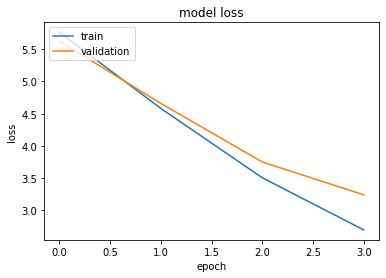

In [58]:
import matplotlib.pyplot as plt
print(history.history.keys())
# "Loss"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [59]:
spsval_array[0]

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
pred=model.predict(x_array)
pred

array([[1.12917718e-04, 2.46935029e-04, 5.44339535e-04, ...,
        5.85342495e-05, 1.76016893e-05, 9.74579161e-05],
       [1.18255892e-04, 1.34127156e-04, 5.31984027e-04, ...,
        1.00634905e-04, 2.42321130e-05, 6.17392725e-05],
       [6.80272526e-04, 1.61150761e-04, 2.37027241e-04, ...,
        1.47305982e-04, 1.87658443e-05, 7.16300128e-05],
       ...,
       [2.37809858e-04, 1.86724981e-04, 3.32062715e-04, ...,
        1.81358177e-04, 1.88139948e-05, 1.16516072e-04],
       [6.58256991e-04, 2.54312879e-04, 2.41325048e-04, ...,
        1.54110792e-04, 1.95209777e-05, 1.11882044e-04],
       [7.71293591e-04, 2.80629989e-04, 3.73859599e-04, ...,
        1.12077585e-04, 1.43815032e-05, 1.85450248e-04]], dtype=float32)

In [61]:
def top(p):
  top=0
  loc=0
  flag=-1
  for i in p:
    #print(flag)
    flag+=1
    if i>top:
      top=i
      loc=flag
  return(loc)


In [62]:
prediction=[]
for i in pred:
  loc=top(i)
  item=list(sps.columns)[top(i)]
  prediction.append(list(sps.columns)[top(i)])

In [ ]:
pip install ml_metrics

  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7845 sha256=2653dd944bfa47f4257224613af54e8c5cf5af9dffddf78f6ed28d8361577aee
  Stored in directory: /root/.cache/pip/wheels/56/41/5b/0c6d42b3604a5c823d8922564c4708f84962fa7f2f4facfa6d
Successfully built ml-metrics


In [ ]:
import ml_metrics
ml_metrics.mapk(prediction, val, 1)

1.0

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
accuracy_score(val,prediction)

0.34677183756938357

In [64]:
base=0
most_pop=0
for i in sps.columns:
  value=sps[i].sum()
  if value>base:
    base=value
    most_pop=i
most_pop


'NF0A7QRBFN4100L'

In [65]:
most_pops=[most_pop]*len(cf['VIP_ID'].unique())

In [66]:
accuracy_score(val,most_pops)

0.010809231668127374

In [ ]:
def build_n2v(dim,wl,nw,wind,mc):
  model = n2v(G, dimensions=dim, walk_length=wl, num_walks=nw)
  embedding = model.fit(window=wind, min_count=wc)
  dic={}
  dic_emb={}
  for i in train_id:
    emb=embedding.wv.get_vector(str(i))
    dic[i]=emb
    dic_emb[str(emb)]=i
  x=list(dic.values())
  x_train=[]
  for i in x:
    x_train.append(np.array(i))
  x_t=pd.DataFrame(x)
  x_array=np.array(x_t)
  return(x_array)
def build_model():
  model=Sequential()
  opt = tf.keras.optimizers.SGD(learning_rate=0.1,clipnorm=1)
  model.add(Dense(41, activation = "relu"))
  model.add(Dense(3000, activation = "relu"))
  model.add(Dense(4334, activation = "softmax"))
  model.compile(optimizer =opt , loss = "categorical_crossentropy", metrics=["accuracy"])
  tf.random.set_seed(888)
  history=model.fit(x_array,sps_array, epochs=2, verbose=1,validation_split=0.2)
  #0.34 walk_length=80
  return(history)

def get_acc():
  pred=model.predict(x_array)
  prediction=[]
  for i in pred:
    loc=top(i)
    item=list(sps.columns)[top(i)]
    prediction.append(list(sps.columns)[top(i)])
  return(accuracy_score(val,prediction))




In [ ]:
#fintune
from node2vec import Node2Vec as n2v #To run node2vec algorithm 
model = n2v(G, dimensions=40, walk_length=80, num_walks=20)
embedding = model.fit(window=5, min_count=1)
dic={}
dic_emb={}
for i in train_id:
  emb=embedding.wv.get_vector(str(i))
  dic[i]=emb
  dic_emb[str(emb)]=i
x=list(dic.values())
x_train=[]
for i in x:
  x_train.append(np.array(i))
x_t=pd.DataFrame(x)
x_t
x_array=np.array(x_t)
#baseline:0.21

Computing transition probabilities:   0%|          | 0/34847 [00:00<?, ?it/s]

Generating walks (CPU: 1):  30%|███       | 6/20 [09:17<23:54, 102.43s/it]

In [ ]:
model=Sequential()
#opt = tf.keras.optimizers.Adam(clipnorm=5,learning_rate=0.1)
#opt = tf.keras.optimizers.SGD(learning_rate=0.1,clipnorm=1)
opt = tf.keras.optimizers.SGD(learning_rate=0.05,clipnorm=1)

'''
model.add(Conv1D(filters = 40, kernel_size = (2),activation='relu'))
model.add(Conv1D(filters = 40, kernel_size = (2),activation='relu'))
model.add(MaxPool1D(pool_size=(2)))
'''
model.add(Dense(41, activation = "relu"))


#model.add(Dense(1000, activation = "relu"))

#model.add(Dense(3000, activation = "relu"))


model.add(Dense(3000, activation = "relu"))
model.add(Dense(4334, activation = "softmax"))

model.compile(optimizer =opt , loss = "categorical_crossentropy", metrics=["accuracy"])
tf.random.set_seed(888)
history=model.fit(x_array,sps_array, epochs=4, verbose=1,validation_split=0.2)
#0.34 walk_length=80

Epoch 1/4
771/771 [==============================] - 4s 5ms/step - loss: 5.7418 - accuracy: 0.0364 - val_loss: 5.6465 - val_accuracy: 0.0581
Epoch 2/4
771/771 [==============================] - 3s 4ms/step - loss: 4.6118 - accuracy: 0.1623 - val_loss: 4.6639 - val_accuracy: 0.2246
Epoch 3/4
771/771 [==============================] - 4s 5ms/step - loss: 3.5195 - accuracy: 0.3248 - val_loss: 3.7281 - val_accuracy: 0.3546
Epoch 4/4
771/771 [==============================] - 4s 5ms/step - loss: 2.6864 - accuracy: 0.4332 - val_loss: 3.1792 - val_accuracy: 0.4184


In [ ]:
pred=model.predict(x_array)
prediction=[]
for i in pred:
  loc=top(i)
  item=list(sps.columns)[top(i)]
  prediction.append(list(sps.columns)[top(i)])
accuracy_score(val,prediction)


0.35277696627389876

In [ ]:
pip install implicit
import implicit

In [ ]:
import numpy as np
#select all vip users
df = data[data['VIP_CODE'].notna()]
df

In [ ]:
#collaborative filtering
colskeep=['VIP_ID','SKU_CODE','QUANTITY']
cf=df[colskeep]
cf

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
train, val = train_test_split(cf, test_size = 0.2, random_state = 1)
train, test = train_test_split(train, test_size = 0.25, random_state = 1)
train

In [ ]:
#store result in graphs

import networkx as nx
from networkx import to_scipy_sparse_matrix
G= nx.from_pandas_edgelist(train, 'VIP_ID', 'SKU_CODE',edge_attr=['QUANTITY'])
G.add_nodes_from(train.VIP_ID, bipartite='VIP_ID')
G.add_nodes_from(train.SKU_CODE, bipartite='SKU_CODE')

G_v=nx.from_pandas_edgelist(val, 'VIP_ID', 'SKU_CODE',edge_attr=['QUANTITY'])
G_v.add_nodes_from(val.VIP_ID, bipartite='VIP_ID')
G_v.add_nodes_from(val.SKU_CODE, bipartite='SKU_CODE')

G_t= nx.from_pandas_edgelist(test, 'VIP_ID', 'SKU_CODE',edge_attr=['QUANTITY'])
G_t.add_nodes_from(test.VIP_ID, bipartite='VIP_ID')
G_t.add_nodes_from(test.SKU_CODE, bipartite='SKU_CODE')

In [ ]:
#convert graph to sparse matrix
W=to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')
W_t=to_scipy_sparse_matrix(G_t, nodelist=None, dtype=None, weight='weight', format='csr')
W_v=to_scipy_sparse_matrix(G_v, nodelist=None, dtype=None, weight='weight', format='csr')

In [ ]:

alpha = 60
train_conf = (W*alpha).astype('double')
#train_conf = (W).astype('double')

import os
os.environ['MKL_NUM_THREADS'] = '1' #To avoid multithreading.
os.environ['OPENBLAS_NUM_THREADS'] = '1'
import implicit
model = implicit.als.AlternatingLeastSquares(factors = 1000, iterations = 100)


In [ ]:
model.fit(train_conf)


In [ ]:
from implicit.evaluation import precision_at_k, train_test_split
from implicit.als import AlternatingLeastSquares

In [ ]:
#test_conf=(W_t*alpha).astype('double')
val_conf=(W_v*alpha).astype('double')
p = precision_at_k(model, train_conf, val_conf, K=5)
p